In [80]:
#!/usr/bin/python3
from pylab import * #import matplotlib & numpy

# Create Normalized Curve:
def Curve(typ, p, t): # normalized curve
    s1 = p[2] * np.sin((p[0]*t+p[1])*np.pi);
    s2 = p[5] * np.sin((p[3]*t+p[4])*np.pi);
    if typ=="sms": return (s1 * s2)/(abs(p[2]) * abs(p[5]))
    if typ=="sps": return (s1 + s2)/(abs(p[2]) + abs(p[5]))
    if len(p)>=9: s3 = p[8] * np.sin((p[6]*t+p[7])*np.pi)
    if typ=="sps3": return (s1 + s2 + s3)/(abs(p[2])+abs(p[5])+abs(p[8]))

# Get Random [linewidth, alpha] Pairs:
def LwAl(n=1): # random [linewidth, alpha]
    wa = np.random.rand(2*n); # n paris: [linewidth, alpha]
    wa[::2] = [round(3.5*i+0.5,1) for i in wa[::2]] # linewidth
    wa[1::2] = [round(0.6*i+0.2,2) for i in wa[1::2]] # alpha
    return wa # type: np.array

# Rotate or Affine the Curve:
def RoAf(t, y, ra=0, af=0): # rotate or affine the curve
    if type(ra) != np.ndarray: # rotational angle -> matrix
        ra *= np.pi; ra = np.array([[cos(ra),-sin(ra)],[sin(ra),cos(ra)]])
    if type(af) == np.ndarray:   ra = ra.dot(af); # affine & rotate
    y = ra.dot(np.array([t,y])); # rotate/affine the curve
    return y[0,:], y[1,:]

# Draw Curve with Annotation:
def DrawCu(typ, p=[], xi=0, dx=40, yo=0, A=1, ra=0, af=0, wa=[]): # draw curve
    if len(p)<6: p = [round(2*i,2) for i in np.random.rand(9)]; p[2]=p[5]=p[8]=1
    t = np.linspace(xi, xi+dx, 30*dx, endpoint=True); # horizontally trans
    y = A * (Curve(typ, p, t) + yo); # vertically scale + translate
    t,y = RoAf(t-(xi+dx/2), y, ra, af); # horizontally adjust -> rotate/affine
    
    if len(wa)<2: wa = LwAl(); # get [linewidth, alpha]
    an = typ+": "+", ".join([str(i) for i in p])+"->"+", ".join([str(i) for i in wa])
    plot(t, y, color="k", lw=wa[0], alpha=wa[1], label=an);
    return p, wa

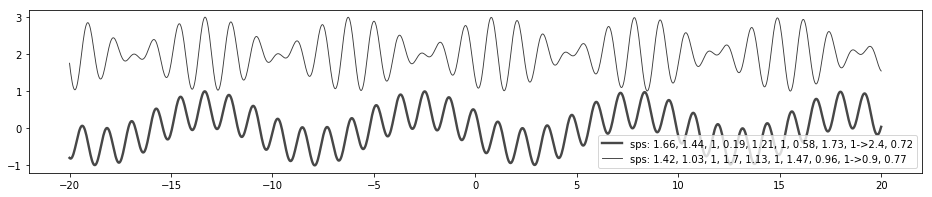

In [87]:
# Random search paras:
figure(figsize=(16,3))
DrawCu("sps",yo=0); DrawCu("sps",yo=2);
legend(loc='lower right'); show()

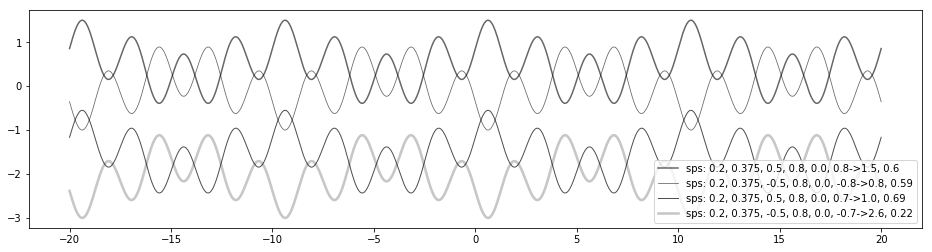

In [89]:
# Finetune paras of sps:
figure(figsize=(16,4))
#p = [0.1, 0.5, 5, 1, 0.0, 2]; DrawCu("sps", p, yo=2)
#p = [0.05, 0.5, 1, 0.8, 0.0, 2]; DrawCu("sps", p, yo=0)
#p = [0.1, 0.5, 1, 1.0, 0.0, 0.5]; DrawCu("sps", p, yo=2)
#p = [0.1, 0.0, 1, 0.5, 0.0, 1]; DrawCu("sps", p, yo=0)
#p = [0.1, 0.0, 1, 0.7, 0.0, 1]; DrawCu("sps", p, yo=2)
#p = [0.1, 0.0, 1, 0.7, 0.0, 0.4]; DrawCu("sps", p, yo=0)

#p = [1.1, 0.0, 1, 0.8, 0.05, 1]; DrawCu("sps", p, yo=2)
#p = [0.6, 0.5, 1, 0.75, 1.0, 1]; DrawCu("sps", p, yo=0)
#p = [0.25, 0.7, 1, 0.5, 0.9, 1]; DrawCu("sps", p, yo=2)
#p = [0.25, 0.25, 1, 1.0, -0.5, 1]; DrawCu("sps", p, yo=0)
#p = [0.25, 0.25, 1, 1.0, 0.5, 1]; DrawCu("sps", p, yo=2)
#p = [0.5, 0.0, 1, 0.3, 0.0, 1]; DrawCu("sps", p, yo=0)
#p = [0.5, 0.0, 1, 0.7, 0.0, 1]; DrawCu("sps", p, yo=2)
#p = [0.6, 0.0, 1, 1.0, 0.0, 1]; DrawCu("sps", p, yo=0)
#p = [1.0, 0.0, 1, 1.2, 0.5, 1]; DrawCu("sps", p, yo=2)
#p = [0.8, 0.0, 1, 1.0, 0.63, 1]; DrawCu("sps", p, yo=0)
#p = [0.8, 0.0, 1, 1.2, 0.75, 1]; DrawCu("sps", p, yo=2)
#p = [1.5, 0.5, 1, 1.8, 1.5, 1]; DrawCu("sps", p, yo=0)

#p = [0.8, 1.5, 0.5, 1.0, 0.5, 1.5]; DrawCu("sps", p, yo=2)
#p = [0.8, 0.5, 0.4, 0.3, 0.0, 0.4]; DrawCu("sps", p, yo=0)

#p = [0.1, 3/8, 1, 0.4, 0.0, 1]; DrawCu("sps", p, yo=2)
#p = [0.2, 3/8, 1, 0.8, 0.0, 1]; DrawCu("sps", p, yo=0) # Good
#p = [0.2, 3/8, 0.5, 0.8, 0.0, 0.8]; DrawCu("sps", p, yo=0) # Good
p = [0.2, 3/8, 0.5, 0.8, 0.0, 0.8]; DrawCu("sps", p, yo=0.5) # Good
p = [0.2, 3/8, -0.5, 0.8, 0.0, -0.8]; DrawCu("sps", p, yo=0) # Good
p = [0.2, 3/8, 0.5, 0.8, 0.0, 0.7]; DrawCu("sps", p, yo=-1.55) # Good
p = [0.2, 3/8, -0.5, 0.8, 0.0, -0.7]; DrawCu("sps", p, yo=-2) # Good
legend(loc='lower right'); show()

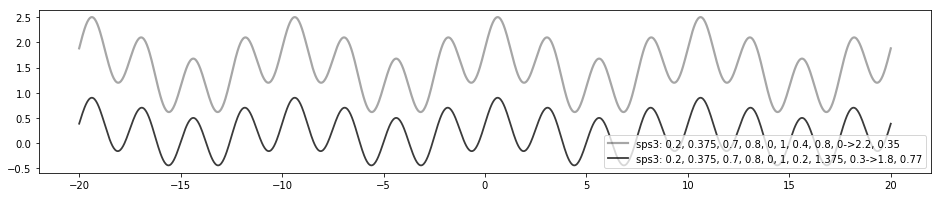

In [92]:
# Finetune paras of sps3:
figure(figsize=(16,3))
#p = [1.0, 0.0, 1, 1.2, 0.5, 1, 0.05, 0.0, 0.2]; DrawCu("sps3", p, yo=2)
#p = [1.0, 0.0, 1, 1.2, 0.5, 1, 0.05, 0.35, 1]; DrawCu("sps3", p, yo=0)
#p = [1.0, 0.0, 1, 1.2, 1.5, 0.3, 0.02, 0.35, 0.6]; DrawCu("sps3", p, yo=2)
p = [0.2, 3/8, 0.7, 0.8, 0, 1, 0.4, 0.8, 0]; DrawCu("sps3", p, yo=1.5)
p = [0.2, 3/8, 0.7, 0.8, 0, 1, 0.2, 11/8, 0.3]; DrawCu("sps3", p, yo=0.2)
#p = [0.2, 3/8, -0.7, 0.8, 0, -1, 0.2, 11/8, -0.3]; DrawCu("sps3", p, yo=0)
legend(loc='lower right'); show()

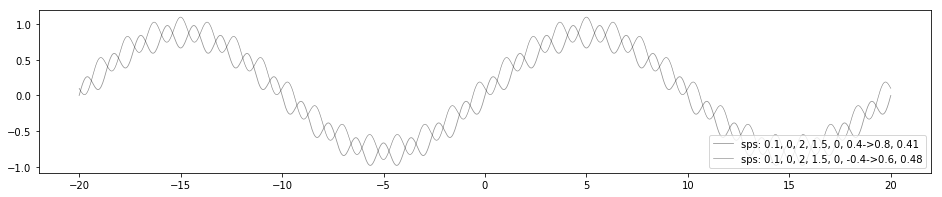

In [93]:
# Search paras for Type3:
figure(figsize=(16,3))
p = [0.1, 0, 2, 1.5, 0, 0.4]; DrawCu("sps", p, yo=0)
p = [0.1, 0, 2, 1.5, 0, -0.4]; DrawCu("sps", p, yo=0.1)
legend(loc='lower right'); show()

In [204]:
# Default sps Cell Parameters:
def Paras(typ, dx): # Default sps Cell Parameters
    if typ==1: # Reticulate Pattern Type1
        A = 42; f = 24/dx; p = [0.2*f, 3/8, 0.5, 0.8*f, 0, 0.8]
    if typ==2: # Reticulate Pattern Type2
        A = 30; f = 16/dx; p = [0.2*f, 3/8, 0.5, 0.8*f, 0, 0.75]
    if typ==3: # Reticulate Pattern Type3
        A = 55; f = 16/dx; p = [0.2*f, 3/8, 0.5, 0.8*f, 0, 0.8]
        f = np.array([[1,-0.5],[-0.15,1]]); # Affine Matrix for Type3
    if typ==4: # Reticulate Pattern Type4
        A = 10; f = 15/dx; p = [0.2*f, 3/8, 0.5, 0.8*f, 0, 0.8]
        f = np.array([[1.15,1.1],[-0.45,0.7]]); # Affine Matrix for Type4
    return A, p, f

# Draw Reticulate Pattern Cell(sps):
def DrawCel(dx=180, yi=0, typ=1, ra=0, wa=[], A=42, f=24): # draw sps cell
    xi = round(dx*np.random.rand(),1); dx *= 2;
    dy = round(0.2+(np.random.rand()-0.5)/10, 3);
    if typ in (1,2,3,4):  A,p1,f = Paras(typ,dx); # use default
    else: f /= dx; p1 = [0.2*f, 3/8, 0.5, 0.8*f, 0, 0.8-(typ%2)/10]
    p2 = p1.copy(); p2[::-3] = [-i for i in p2[::-3]]
    
    t = np.linspace(xi, xi+dx, 30*dx, endpoint=True); # horizontal trans
    y1 = A * (Curve("sps", p1, t) + (yi+dy)); # vertically scale + trans
    y2 = A * (Curve("sps", p2, t) + (yi-dy)); # vertically scale + trans
    t -= xi+dx/2; t1,y1 = RoAf(t,y1,ra,f); t2,y2 = RoAf(t,y2,ra,f) # rotate/affine
    if len(wa)<4: wa = LwAl(2) # get [linewidth, alpha]
    plot(t1, y1, color="b", lw=wa[0], alpha=wa[1])
    plot(t2, y2, color="b", lw=wa[2], alpha=wa[3])

# Draw Reticulate Pattern Cell(sps):
def DrawCell(dx=180, yi=0, typ=1, ra=0, wa=[], A=42, f=24): # draw sps cell
    xi = round(dx*np.random.rand(),1); dx *= 2;
    dy = round(0.2+(np.random.rand()-0.5)/10, 3);
    if typ in (1,2,3,4):  A,p1,f = Paras(typ,dx); # use default
    else: f /= dx; p1 = [0.2*f, 3/8, 0.5, 0.8*f, 0, 0.8-(typ%2)/10]
    p2 = p1.copy(); p2[::-3] = [-i for i in p2[::-3]]
    if len(wa)<4: wa = LwAl(2) # get [linewidth, alpha]
    DrawCu("sps", p1, xi, dx, yi+dy, A, ra, f, wa=wa[:2])
    DrawCu("sps", p2, xi, dx, yi-dy, A, ra, f, wa=wa[2:])

# Add Reticulate Net to Image:
def Add2Im(im, fun, typ=1, ra=0, wa=[], gap=1.65): # add to image
    y,x,n = im.shape; n = y//20;
    ofs = round(1.5*np.random.rand(), 2)
    gap = round(gap+(np.random.rand()-0.3)/10, 2);
    if len(wa)<4: wa = [3,0.4, 2,0.6] # linewidth, alpha
    for i in range(2*n): fun(x, gap*(i-n)+ofs, typ, ra, wa)
    imshow(im, extent=(-x/2,x/2,-y/2,y/2)); axis("off")

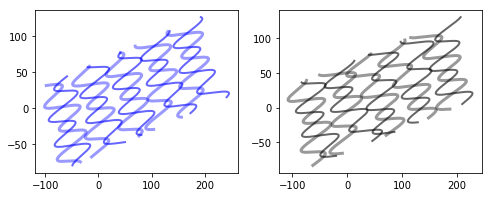

In [177]:
# Test Rotations:
figure(figsize=(8,3)); wa = [3,0.4, 2,0.6];
subplot(1,2,1);
for i in range(5): DrawCel(60, (i-3)*1.5, 0, 0.6, wa, f=8)
subplot(1,2,2);
for i in range(5): DrawCell(60, (i-3)*1.5, 0, 0.6, wa, f=8)
show()

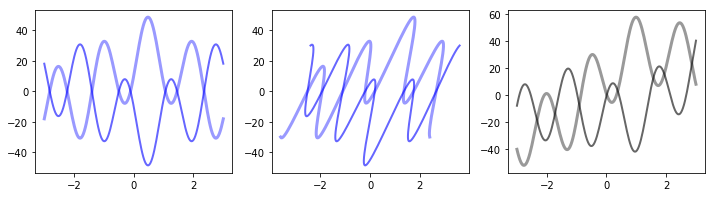

In [178]:
# Test Affine:
figure(figsize=(12,3)); wa = [3,0.4, 2,0.6];
ro = np.array([[1,0],[0,1]]);
af1 = np.array([[1,0.02],[0,1]]);
af2 = np.array([[1,0],[8,1]]);
subplot(1,3,1); DrawCel(3, 0, 0, ro, wa, f=10);
subplot(1,3,2); DrawCel(3, 0, 0, af1, wa, f=10);
subplot(1,3,3); DrawCell(3, 0, 0, af2, wa, f=10);
show()

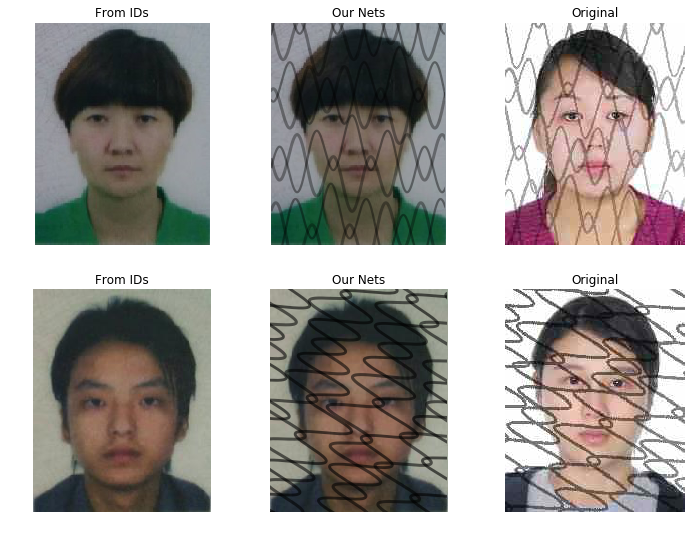

In [129]:
# Test Type1:
figure(figsize=(12,9))

wa = [2.2,0.4, 3,0.35];
im = imread("E:/Hua/Test/111.jpg");
im2 = imread("E:/Hua/Test/N1.1.jpg");
subplot(2,3,1); title("From ID"); imshow(im); axis("off");
subplot(2,3,2); title("Our Net"); Add2Im(im, DrawCell,1, ra=0.0, wa=wa);
subplot(2,3,3); title("Original"); imshow(im2); axis("off");

wa = [3,0.55, 2.8,0.6];
im = imread("E:/Hua/Test/222.jpg");
im2 = imread("E:/Hua/Test/N1.2.jpg");
subplot(2,3,4); title("From ID"); imshow(im); axis("off");
subplot(2,3,5); title("Our Net"); Add2Im(im, DrawCell,1, ra=0.4, wa=wa);
subplot(2,3,6); title("Original"); imshow(im2); axis("off");

savefig("E:/Hua/Test/out1.jpg"); show()

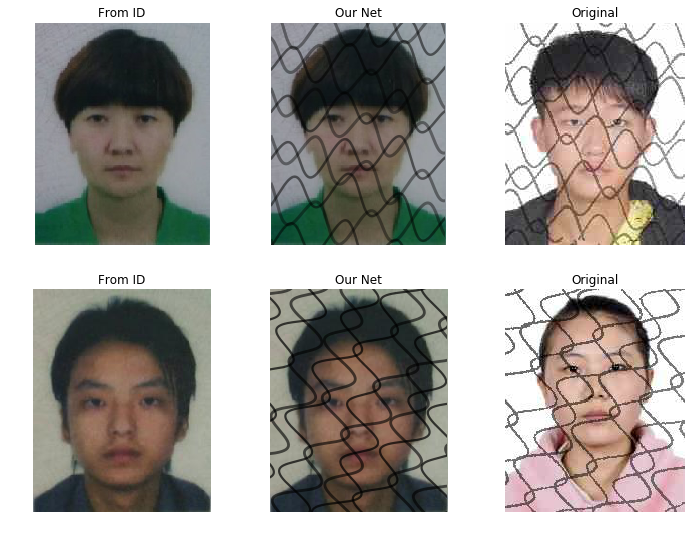

In [209]:
# Test Type2:
figure(figsize=(12,9))

wa = [2.5,0.5, 3,0.4];
im = imread("E:/Hua/Test/111.jpg");
im2 = imread("E:/Hua/Test/N2.1.jpg");
subplot(2,3,1); title("From ID"); imshow(im); axis("off");
subplot(2,3,2); title("Our Net"); Add2Im(im, DrawCell,2, ra=-0.05, wa=wa, gap=1.6);
subplot(2,3,3); title("Original"); imshow(im2); axis("off");

wa = [2.2,0.7, 2.8,0.6];
im = imread("E:/Hua/Test/222.jpg");
im2 = imread("E:/Hua/Test/N2.4.jpg");
subplot(2,3,4); title("From ID"); imshow(im); axis("off");
subplot(2,3,5); title("Our Net"); Add2Im(im, DrawCell,2, ra=0.4, wa=wa, gap=1.6);
subplot(2,3,6); title("Original"); imshow(im2); axis("off");

savefig("E:/Hua/Test/out2.jpg"); show()

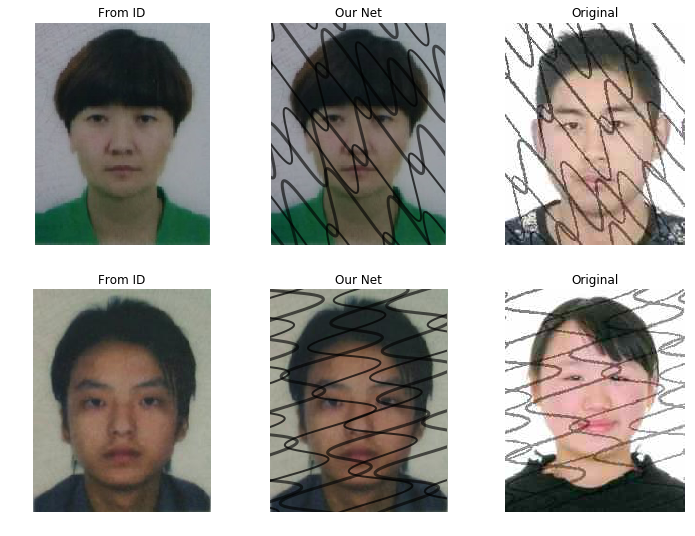

In [205]:
# Test Type3:
figure(figsize=(12,9));

wa = [3,0.6, 2,0.7];
im = imread("E:/Hua/Test/111.jpg");
im2 = imread("E:/Hua/Test/N3.6.jpg");
subplot(2,3,1); title("From ID"); imshow(im); axis("off");
subplot(2,3,2); title("Our Net"); Add2Im(im, DrawCell,3, ra=0, wa=wa, gap=1.6);
subplot(2,3,3); title("Original"); imshow(im2); axis("off");

im = imread("E:/Hua/Test/222.jpg");
im2 = imread("E:/Hua/Test/N3.1.jpg");
subplot(2,3,4); title("From ID"); imshow(im); axis("off");
subplot(2,3,5); title("Our Net"); Add2Im(im, DrawCell,3, ra=0.39, wa=wa, gap=1.55);
subplot(2,3,6); title("Original"); imshow(im2); axis("off");

savefig("E:/Hua/Test/out3.jpg"); show()

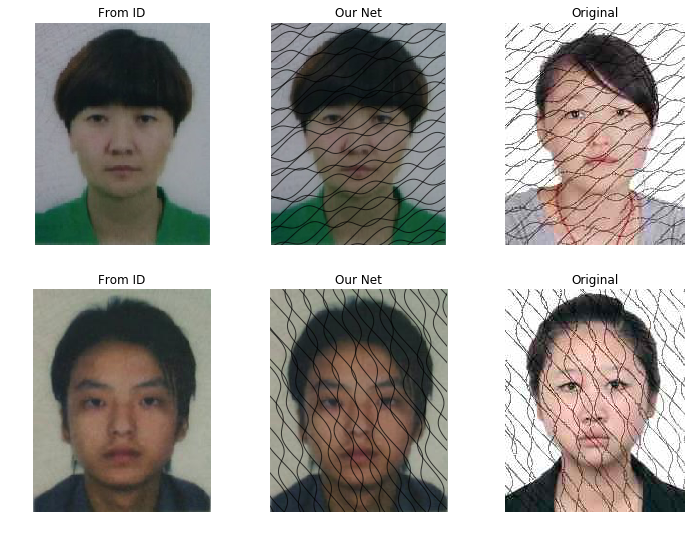

In [215]:
# Test Type4:
figure(figsize=(12,9));

wa = [1,0.7, 1,0.7];
im = imread("E:/Hua/Test/111.jpg");
im2 = imread("E:/Hua/Test/N4.2.jpg");
subplot(2,3,1); title("From ID"); imshow(im); axis("off");
subplot(2,3,2); title("Our Net"); Add2Im(im, DrawCell,4, ra=0.25, wa=wa, gap=1.6);
subplot(2,3,3); title("Original"); imshow(im2); axis("off");
im = imread("E:/Hua/Test/222.jpg");
im2 = imread("E:/Hua/Test/N4.4.jpg");
subplot(2,3,4); title("From ID"); imshow(im); axis("off");
subplot(2,3,5); title("Our Net"); Add2Im(im, DrawCell,4, ra=-0.26, wa=wa, gap=1.7);
subplot(2,3,6); title("Original"); imshow(im2); axis("off");

savefig("E:/Hua/Test/out4.jpg"); show()

In [137]:
imshow?